Este colab fue adaptado por Arnold Charry Armero.

# Nearest Neighbor

La heurística del vecino más cercano simplemente busca al vecino que esté más cercano al valor depot que se seleccione. De esta manera, la ruta continua por ese camino, por el que está más cerca y así sucesivamente. Este algoritmo no arroja la solución óptima, sino que dependiendo del valor inicial se obtiene una solución. Se resolverá un ejemplo para la comprensión de este algoritmo.

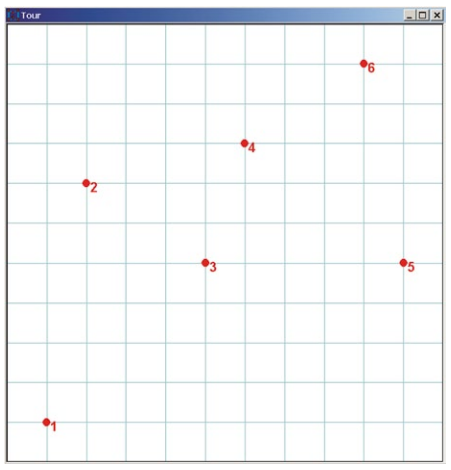

In [1]:
# Primero se van a calcular las distancias entre cada punto teniendo cada uno
P1 = [0, 0]
P2 = [100, 600]
P3 = [400, 400]
P4 = [500, 700]
P5 = [900, 400]
P6 = [800, 900]
Puntos = [P1, P2, P3, P4, P5, P6]

In [2]:
# Se define la función para calcular distancias
def distance_points(x1, y1, x2, y2):
  import numpy as np
  distance = round(np.sqrt((x1 - x2)**2 + (y1 - y2)**2))
  return distance

In [4]:
#Parámetros

n = 6

d = []
for i in range(6):
  d.append([])
  for j in range(6):
    value = distance_points(Puntos[i][0], Puntos[i][1], Puntos[j][0], Puntos[j][1])
    d[i].append(value)

#Matriz d
print("----Matriz d----")
for i in range(6):
  for j in range(6):
    print(d[i][j], end = "  " if d[i][j] >= 0 and d[i][j] < 10 else " ")
  print("")

----Matriz d----
0  608 566 860 985 1204 
608 0  361 412 825 762 
566 361 0  316 500 640 
860 412 316 0  500 361 
985 825 500 500 0  510 
1204 762 640 361 510 0  


In [6]:
#Se reemplaza el 0 por un número muy grande
for i in range(6):
  for j in range(6):
    if i == j:
      d[i][j] = 1000

#Matriz d
print("----Matriz d----")
for i in range(6):
  for j in range(6):
    print(d[i][j], end = "  " if d[i][j] >= 0 and d[i][j] < 10 else " ")
  print("")

----Matriz d----
1000 608 566 860 985 1204 
608 1000 361 412 825 762 
566 361 1000 316 500 640 
860 412 316 1000 500 361 
985 825 500 500 1000 510 
1204 762 640 361 510 1000 


In [23]:
# Define the Nearest Neighbor Algorithm
def nearest_neighbor(distances):
    n = distances.shape[0]
    route = [2] # Start at city 2
    visited = set([2])
    while len(visited) < n:
        current_city = route[-1]
        nearest_city = min([(i, distances[current_city][i]) for i in range(n) if i not in visited], key=lambda x: x[1])[0]
        route.append(nearest_city)
        visited.add(nearest_city)
    route.append(2) # Return to city 2
    return route

In [24]:
# Apply the algorithm to the distance matrix
import numpy as np
d = np.array(d)
route = nearest_neighbor(d)

# Print the optimal route and the total distance
print("Optimal Route: ", route)
print("Total Distance: ", sum(d[route[i]][route[i+1]] for i in range(len(route) - 1)))

Optimal Route:  [2, 3, 5, 4, 1, 0, 2]
Total Distance:  3186


In [25]:
# Reorganizar los puntos según el tour
tour_puntos = [Puntos[i] for i in route]
tour_puntos

[[400, 400],
 [500, 700],
 [800, 900],
 [900, 400],
 [100, 600],
 [0, 0],
 [400, 400]]

Graficándolo en Python,

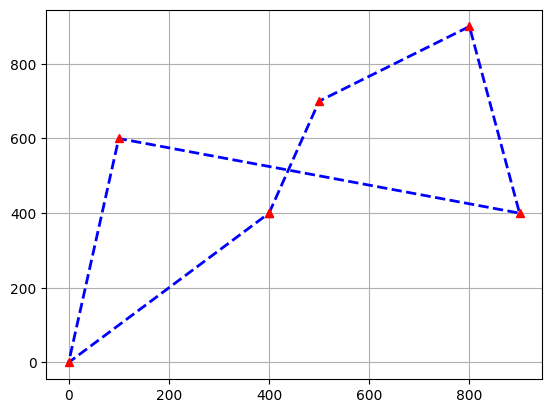

In [26]:
x = [tour_puntos[i][0] for i in range(n+1)]
y = [tour_puntos[i][1] for i in range(n+1)]
import matplotlib.pyplot as plt
plt.plot(x, y, marker='^', mfc='r', mec='r', ms=6, ls='--', c='b', lw=2)
plt.grid()

## Referencias
Bhagavan. (2023, March 26). Solving the Traveling Salesman Problem in Python using the Nearest Neighbor Algorithm. Medium. https://medium.com/@suryabhagavanchakkapalli/solving-the-traveling-salesman-problem-in-python-using-the-nearest-neighbor-algorithm-48fcf8db289a#:~:text=The%20Nearest%20Neighbor%20Algorithm%20is,the%20current%20city%20as%20visited.